In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Problem One

In [189]:
df1 = pd.read_csv('Wholesale+Customers+Data.csv')
df1

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [190]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [192]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


Question 1.1.1 : Use methods of descriptive statistics to summarize data.

In [198]:
print('Total count: ',df1['Buyer/Spender'].count())
print('Most common Channel is',df1['Channel'].mode()[0],'and most common Region is',df1['Region'].mode()[0])
print()
items=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
for i in items:
    print('Details of item',i)
    print('Range of',i,'is from',df1[i].min(),'-',df1[i].max())
    print('Mean=',round(df1[i].mean()))
    print('Median=',df1[i].median())
    print('Standard Deviation=',round(df1[i].std()))
    print('---------------------------------------------------------------')

Total count:  440
Most common Channel is Hotel and most common Region is Other

Details of item Fresh
Range of Fresh is from 3 - 112151
Mean= 12000
Median= 8504.0
Standard Deviation= 12647
---------------------------------------------------------------
Details of item Milk
Range of Milk is from 55 - 73498
Mean= 5796
Median= 3627.0
Standard Deviation= 7380
---------------------------------------------------------------
Details of item Grocery
Range of Grocery is from 3 - 92780
Mean= 7951
Median= 4755.5
Standard Deviation= 9503
---------------------------------------------------------------
Details of item Frozen
Range of Frozen is from 25 - 60869
Mean= 3072
Median= 1526.0
Standard Deviation= 4855
---------------------------------------------------------------
Details of item Detergents_Paper
Range of Detergents_Paper is from 3 - 40827
Mean= 2881
Median= 816.5
Standard Deviation= 4768
---------------------------------------------------------------
Details of item Delicatessen
Range of De

Question 1.1.2 Which Region and which Channel spent the most?

In [263]:
print('Total Amount spent in the region')
for i in df1['Region'].unique():
    df1_new=df1[df1['Region']==i]
    df1_new_1=pd.DataFrame()
    df1_new_1=df1_new.groupby('Channel').sum()
    df1_new_1.drop('Buyer/Spender',axis=1,inplace=True)
    df1_new_1['Sum']=df1_new_1.sum(axis=1)
    print(i,'=',df1_new_1['Sum'].sum())
print()
print('Total Amount spent in the Channel')
for i in df1['Channel'].unique():
    df1_new=df1[df1['Channel']==i]
    df1_new_1=pd.DataFrame()
    df1_new_1=df1_new.groupby('Region').sum()
    df1_new_1.drop('Buyer/Spender',axis=1,inplace=True)
    df1_new_1['Sum']=df1_new_1.sum(axis=1)
    print(i,'is',df1_new_1['Sum'].sum())    

Total Amount spent in the region
Other = 10677599
Lisbon = 2386813
Oporto = 1555088

Total Amount spent in the Channel
Retail is 6619931
Hotel is 7999569


'Other' region and 'Hotel' channel has spent the most

Question 1.1.3 Which Region and which Channel spent the least?

In [265]:
print('Total Amount spent in the region')
for i in df1['Region'].unique():
    df1_new=df1[df1['Region']==i]
    df1_new_1=pd.DataFrame()
    df1_new_1=df1_new.groupby('Channel').sum()
    df1_new_1.drop('Buyer/Spender',axis=1,inplace=True)
    df1_new_1['Sum']=df1_new_1.sum(axis=1)
    print(i,'=',df1_new_1['Sum'].sum())
print()
print('Total Amount spent in the Channel')
for i in df1['Channel'].unique():
    df1_new=df1[df1['Channel']==i]
    df1_new_1=pd.DataFrame()
    df1_new_1=df1_new.groupby('Region').sum()
    df1_new_1.drop('Buyer/Spender',axis=1,inplace=True)
    df1_new_1['Sum']=df1_new_1.sum(axis=1)
    print(i,'is',df1_new_1['Sum'].sum())    

Total Amount spent in the region
Other = 10677599
Lisbon = 2386813
Oporto = 1555088

Total Amount spent in the Channel
Retail is 6619931
Hotel is 7999569


'Oporto' region and 'Retail' channel has spent the least

Question 1.2. There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [271]:
df1_new=df1.drop('Buyer/Spender',axis=1)
df1_new

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [278]:
unique_region=df1_new['Region'].unique()
unique_channel=['Retail','Hotel']
for i in unique_channel:
    print('----------------------------------------------------------------------------------------------------------------')
    print('Details of Channel:',i)
    print('----------------------------------------------------------------------------------------------------------------')
    for j in unique_region:
            #print('')
            print('Details of Region:',j)
            #print('')
            print(df1_new[(df1_new['Channel']==i) & (df1_new['Region']==j)].describe().T)

----------------------------------------------------------------------------------------------------------------
Details of Channel: Retail
----------------------------------------------------------------------------------------------------------------
Details of Region: Other
                  count          mean           std     min     25%      50%  \
Fresh             105.0   9831.504762   9635.394129    23.0  2343.0   7362.0   
Milk              105.0  10981.009524  10574.827178  1124.0  6128.0   7845.0   
Grocery           105.0  15953.809524  12298.935356  4523.0  9170.0  12121.0   
Frozen            105.0   1513.200000   1504.498737    33.0   437.0   1059.0   
Detergents_Paper  105.0   6899.238095   6022.091110   523.0  3537.0   5121.0   
Delicatessen      105.0   1826.209524   2119.052222     3.0   545.0   1386.0   

                      75%      max  
Fresh             15076.0  44466.0  
Milk              11114.0  73498.0  
Grocery           19805.0  92780.0  
Frozen       

•	Highest mean for the Fresh items in Hotel channel across Other regions.<br>
•	Similarly max value is present for Fresh items in Hotel channel across Other regions.<br>
•	is the minimum value for few items.<br>
•	Other is the most popular, Oporto is the least popular region in Hotel channel.<br>
•	Other is the most popular, Libson is the least popular region in Retail channel.<br>
•	Outliers are present for most of the regions.<br>

Question 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [279]:
Items_dict={}
for i in items:
    Items_dict.update({i:df1[i].std()/df1[i].mean()})
Items_dict

{'Fresh': 1.0539179237473149,
 'Milk': 1.2732985840065414,
 'Grocery': 1.1951743730016824,
 'Frozen': 1.5803323836352914,
 'Detergents_Paper': 1.6546471385005155,
 'Delicatessen': 1.8494068981158382}

In [280]:
print('Item',max(Items_dict, key= lambda x: Items_dict[x]),'is most inconsistent with co-varriance value',max(Items_dict.values()))

Item Delicatessen is most inconsistent with co-varriance value 1.8494068981158382


In [281]:
print('Item',min(Items_dict, key= lambda x: Items_dict[x]),'is least inconsistent with co-varriance value',min(Items_dict.values()))

Item Fresh is least inconsistent with co-varriance value 1.0539179237473149


Question 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

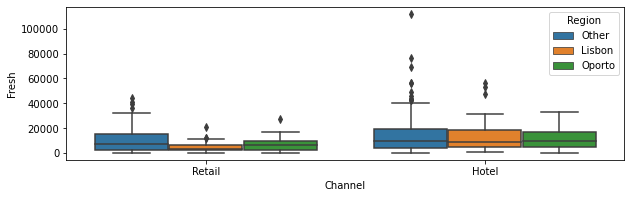

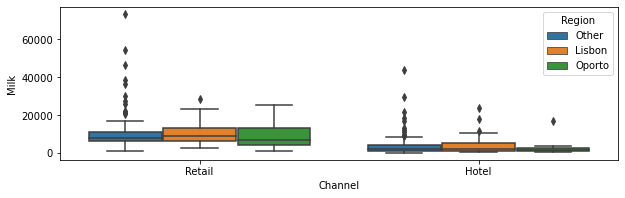

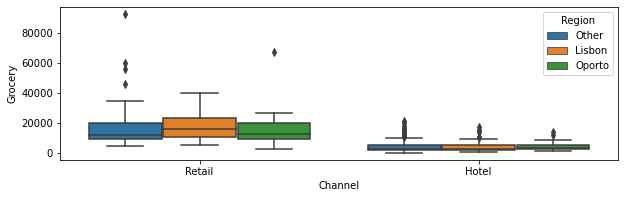

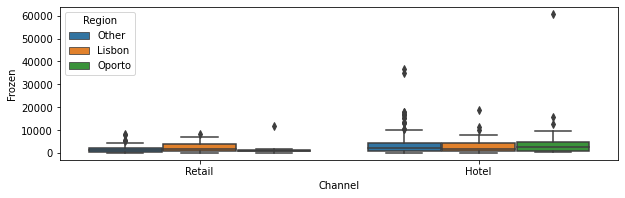

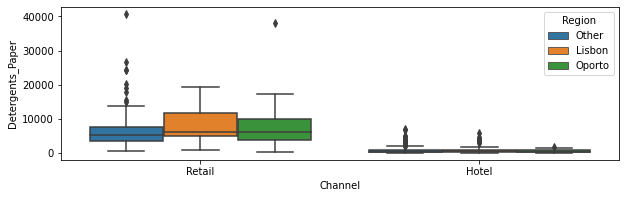

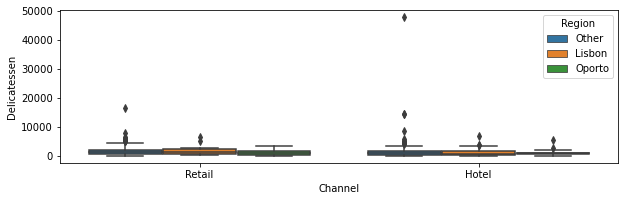

In [105]:
for i in items:
    plt.figure(figsize= (10,40))
    plt.subplot(12,1,1)
    sns.boxplot(x='Channel',y=i, data=df1, hue='Region'); 

Yes, there are outliers

•Fresh item has outliers for all channels and region except for Oporto region in Hotel channel.<br>
•Milk item has outliers for all channels and region except for Oporto region in Retail channel.<br>
•Grocery items have outliers across all channels and regions except Lisbon region in Retail channel.<br>
•Frozen items have outliers across all channels and regions.<br>
•Detergents Papers have outliers across all regions and channel except Lisbon region in Retail channel.<br>
•Delicatessen has outliers across all regions and channel except Oporto region in Retail channel.<br>

Question : 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

•Hotel channel and other regions have bought fresh items more than any other items; sales can be improved by focusing on hotels in other regions since Fresh item is the most consistent item.<br>
•Supply of Delicatessen item can be reduced across all regions and channels since they are least bought and highly inconsistent.<br>
•Retail channel have noticed that outliers are not present in few regions.<br>


Problem two

In [282]:
df2=pd.read_csv('Survey-1.csv')

In [283]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [284]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [285]:
df2.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [286]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

In [287]:
data_gender_major = pd.crosstab(df2['Gender'],
                            df2['Major'],
                              margins=True )
data_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


2.1.2. Gender and Grad Intention

In [288]:
data_gender_grad_intention = pd.crosstab(df2['Gender'],
                            df2['Grad Intention'],
                              margins=True )
data_gender_grad_intention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


2.1.3. Gender and Employment

In [289]:
data_gender_emp = pd.crosstab(df2['Gender'],
                            df2['Employment'],
                              margins=True )
data_gender_emp

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


2.1.4. Gender and Computer

In [290]:
data_gender_cmp = pd.crosstab(df2['Gender'],
                            df2['Computer'],
                              margins=True )
data_gender_cmp

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [291]:
print('Probability that a randomly selected CMSU student will be male is {}/{}'.format(df2['Gender'].value_counts()['Male'],df2.shape[0]))

Probability that a randomly selected CMSU student will be male is 29/62


2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [292]:
print('Probability that a randomly selected CMSU student will be female is {}/{}'.format(df2['Gender'].value_counts()['Female'],df2.shape[0]))

Probability that a randomly selected CMSU student will be female is 33/62


2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.3.1 Find the conditional probability of different majors among the male students in CMSU.

P(Major from major_list | Male)

In [293]:
major_list=['Accounting','CIS','Economics/Finance','International Business','Management','Other','Retailing/Marketing','Undecided']

In [294]:
for i in major_list:
    print('Conditional probability of major',i,'among male is {}/{}'.format(data_gender_major.loc['Male'][i],data_gender_major.loc['Male']['All']))

Conditional probability of major Accounting among male is 4/29
Conditional probability of major CIS among male is 1/29
Conditional probability of major Economics/Finance among male is 4/29
Conditional probability of major International Business among male is 2/29
Conditional probability of major Management among male is 6/29
Conditional probability of major Other among male is 4/29
Conditional probability of major Retailing/Marketing among male is 5/29
Conditional probability of major Undecided among male is 3/29


2.3.2 Find the conditional probability of different majors among the female students of CMSU.

P(Major from major_list | Female)

In [295]:
for i in major_list:
    print('Conditional probability of major',i,'among female is {}/{}'.format(data_gender_major.loc['Female'][i],data_gender_major.loc['Female']['All']))

Conditional probability of major Accounting among female is 3/33
Conditional probability of major CIS among female is 3/33
Conditional probability of major Economics/Finance among female is 7/33
Conditional probability of major International Business among female is 4/33
Conditional probability of major Management among female is 4/33
Conditional probability of major Other among female is 3/33
Conditional probability of major Retailing/Marketing among female is 9/33
Conditional probability of major Undecided among female is 0/33


2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

P(Male and Intends to Graduate) = P(Male) P(Intends to Graduate|Male)

In [296]:
data_gender_grad_intention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [297]:
print('P(Male)=Total Male/Total number of students => {}/{}'.format(df2['Gender'].value_counts()['Male'],df2.shape[0]))
print('P(Intends to Graduate|Male)= Total Male intends to Graduate/Total Male=> {}/{}'.format(data_gender_grad_intention.loc['Male']['Yes'],data_gender_grad_intention.loc['Male']['All']))
print('Probablity that a randomly chosen male student intends to graduate is',(29/62)*(17/29))

P(Male)=Total Male/Total number of students => 29/62
P(Intends to Graduate|Male)= Total Male intends to Graduate/Total Male=> 17/29
Probablity that a randomly chosen male student intends to graduate is 0.27419354838709675


2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

P(Female and no Laptop) = P(Female) P(no Laptop|Female)

In [309]:
data_gender_cmp

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [310]:
print('P(Female)=Total Female/Total number of students => {}/{}'.format(df2['Gender'].value_counts()['Female'],df2.shape[0]))
print('P(no Laptop|Female)= Total female having no laptop/Total female=> {}/{}'.format(data_gender_cmp.loc['Female']['Desktop']+data_gender_cmp.loc['Female']['Tablet'],data_gender_cmp.loc['Female']['All']))
print('Probablity that a randomly chosen male student intends to graduate is',(33/62)*(4/33))

P(Female)=Total Female/Total number of students => 33/62
P(no Laptop|Female)= Total female having no laptop/Total female=> 4/33
Probablity that a randomly chosen male student intends to graduate is 0.06451612903225806


2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

P(Male U Full-time) = P(Male) + P(Full-time) - P(Male ∩ Full-time)

In [300]:
data_gender_emp

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [167]:
print('P(Male) = {}/{}'.format(df2['Gender'].value_counts()['Male'],df2.shape[0]))
print('P(Full-time) = {}/{}'.format(df2['Employment'].value_counts()['Full-Time'],df2.shape[0]))
print('P(Male ∩ Full-time) = {}/{}'.format(len(df2[(df2['Gender']=='Male') & (df2['Employment']=='Full-Time')]),df2.shape[0]))
print('Probability that a randomly chosen student is a male or has a full-time employment is \nP(Male U Full-time) = P(Male)+P(Full-time)-P(Male ∩ Full-time)=>(29+10-7)/62 =>',(29+10-7)/62)

P(Male) = 29/62
P(Full-time) = 10/62
P(Male ∩ Full-time) = 7/62
Probability that a randomly chosen student is a male or has a full-time employment is 
P(Male U Full-time) = P(Male)+P(Full-time)-P(Male ∩ Full-time)=>(29+10-7)/62 => 0.5161290322580645


2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

P(international business OR management | Female) = P(international business|Female) + P(management|Female) 

In [168]:
data_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [301]:
print('P(international business|Female)={}/{}'.format(data_gender_major.loc['Female']['International Business'],df2['Gender'].value_counts()['Female']))
print('P(management|Female)={}/{}'.format(data_gender_major.loc['Female']['Management'],df2['Gender'].value_counts()['Female']))
print('P(international business ∪ management|Female)=(4/33)+(4/33)=>',(4/33)+(4/33))

P(international business|Female)=4/33
P(management|Female)=4/33
P(international business ∪ management|Female)=(4/33)+(4/33)=> 0.24242424242424243


2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [302]:
data_cont = pd.crosstab(df2['Gender'],df2['Grad Intention'],margins=True )
data_cont

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


P(Female and Graduate intention) = P(Female).P(Graduate intention|Female) #dependent event

In [303]:
print('P(Female and Graduate intention) = {}/{}'.format(len(df2[(df2['Gender']=='Female') & (df2['Grad Intention']=='Yes')]),data_cont['All']['All']),'=>',11/62)
print('P(Female)={}/{}'.format(df2['Gender'].value_counts()['Female'],data_cont['All']['All']))
print('P(Graduate intention|Female)={}/{}'.format(data_cont.loc['Female']['Yes'],data_cont.loc['Female']['All']))
print('P(Female)*P(Graduate intention|Female)=>(33/62)*(11/33) =>',(33/62)*(11/33))

P(Female and Graduate intention) = 11/62 => 0.1774193548387097
P(Female)=33/62
P(Graduate intention|Female)=11/33
P(Female)*P(Graduate intention|Female)=>(33/62)*(11/33) => 0.17741935483870966


From the above output,<br>
P(Female and Graduate intention)=P(Female)*P(Graduate intention|Female)<br>
Therefore they are dependent events and not independent events

2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [304]:
print('Probability of randomly chosen student has a GPA less than 3 is {}/{}'.format((df2[df2['GPA']<3]).shape[0],df2.shape[0]))

Probability of randomly chosen student has a GPA less than 3 is 17/62


2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [172]:
print('Conditional probability that a randomly selected male earns 50 or more => P(Salary>=50|Male)')
print('Total number of males having salary more than 50 =',len(df2[(df2['Gender']=='Male') & (df2['Salary']>=50.0)]))
print('Total number of male =',df2['Gender'].value_counts()['Male'])
print('P(Salary>=50|Male) = Total number of males having salary more than 50 / Total number of male => 14/29')
print('P(Salary>=50|Male) =',len(df2[(df2['Gender']=='Male') & (df2['Salary']>=50.0)])/df2['Gender'].value_counts()['Male'])

Conditional probability that a randomly selected male earns 50 or more => P(Salary>=50|Male)
Total number of males having salary more than 50 = 14
Total number of male = 29
P(Salary>=50|Male) = Total number of males having salary more than 50 / Total number of male => 14/29
P(Salary>=50|Male) = 0.4827586206896552


In [173]:
print('Conditional probability that a randomly selected female earns 50 or more => P(Salary>=50|Female)')
print('Total number of females having salary more than 50 =',len(df2[(df2['Gender']=='Female') & (df2['Salary']>=50.0)]))
print('Total number of female =',df2['Gender'].value_counts()['Female'])
print('P(Salary>=50|Female) = Total number of Females having salary more than 50 / Total number of female = 18/33')
print('P(Salary>=50|Female) =',len(df2[(df2['Gender']=='Female') & (df2['Salary']>=50.0)])/df2['Gender'].value_counts()['Female'])

Conditional probability that a randomly selected female earns 50 or more => P(Salary>=50|Female)
Total number of females having salary more than 50 = 18
Total number of female = 33
P(Salary>=50|Female) = Total number of Females having salary more than 50 / Total number of female = 18/33
P(Salary>=50|Female) = 0.5454545454545454


2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

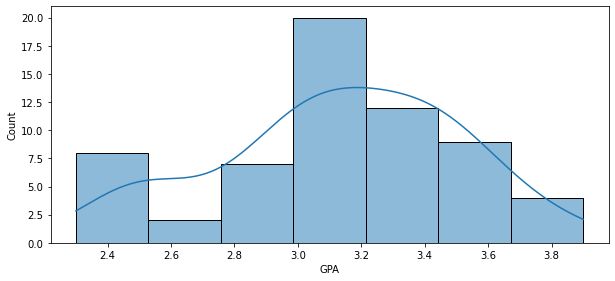

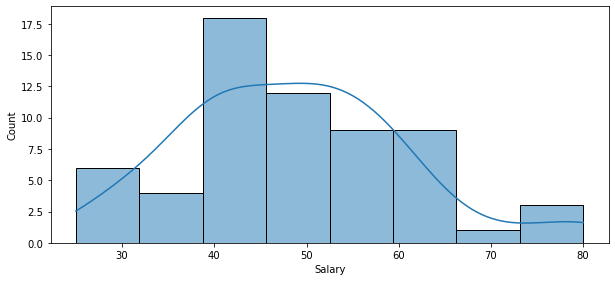

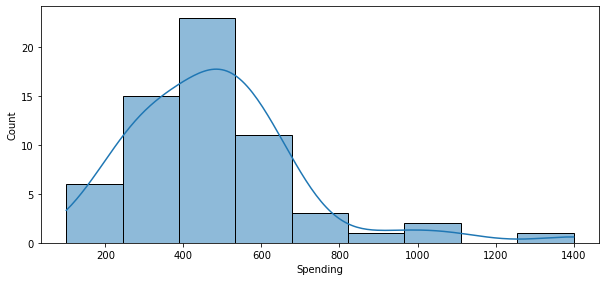

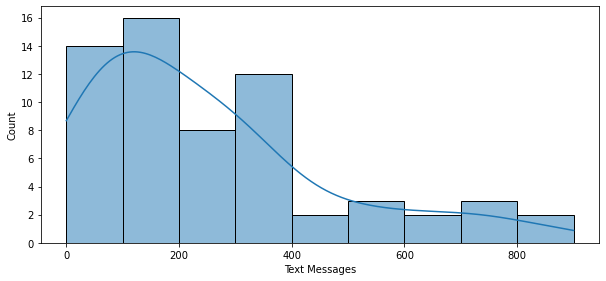

In [174]:
plt.figure(figsize= (10,20))
plt.subplot(4,1,1)
sns.histplot(x="GPA", data=df2,kde=True)

plt.figure(figsize= (10,20))
plt.subplot(4,1,2)
sns.histplot(x="Salary", data=df2,kde=True)

plt.figure(figsize= (10,20))
plt.subplot(4,1,3)
sns.histplot(x="Spending", data=df2,kde=True)

plt.figure(figsize= (10,20))
plt.subplot(4,1,4)
sns.histplot(x="Text Messages", data=df2,kde=True);

GPA is normally distributed<br>
Salary is normally distributed.<br>
Spending is not normally distributed<br>
Text messages is not normally distributed<br>

2.8.2 Write a note summarizing your conclusions

•	Female samples are present more than male samples.<br>
•	Management is the most popular Major among male whereas Retailing/Marketing is the most popular among female. Retailing/Marketing is the most popular Major.<br>
•	Male has higher intention of Graduation rather than female.<br>
•	Ratio of part-time employment is higher than other employment type.<br>
•	Graduate intention events are affected based on the gender.<br>
•	Ratio of female who earn more than or equal to 50 is higher than male. <br>
•	Spending and Texts Messages do not follow bell curve.

Project 3

In [312]:
df3=pd.read_csv('A+%26+B+shingles.csv')

In [313]:
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [314]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [315]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

H0:Mean>=0.35<br>
H1:Mean<0.35

In [316]:
from scipy.stats import ttest_1samp

In [317]:
alpha=0.05

For sample A

In [318]:
t_statistic1, p_value1 = ttest_1samp(df3['A'], 0.35)
print('One sample t test for sample A \nt statistic: {0} p value: {1} '.format(t_statistic1, p_value1/2))

One sample t test for sample A 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


For sample B

In [319]:
t_statistic2, p_value2 = ttest_1samp(df3['B'], 0.35,nan_policy = 'omit')
print('One sample t test for sample B \nt statistic: {0} p value: {1}'.format(t_statistic2, p_value2/2))

One sample t test for sample B 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826


In [320]:
print('Level of significance: %.2f' %alpha)

print ("\nOur one-sample t-test for sample A, p-value=", p_value1/2)
if (p_value1/2) < alpha: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
    print('So at 95% confidence level, there is sufficient evidence to prove that mean of moisture contents is within permissible limits.')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 
    print('So at 95% confidence level, there is sufficient evidence to prove that mean of moisture contents is not within permissible limits.')
    
print ("\nOur one-sample t-test for sample B, p-value=", p_value2/2)
if (p_value2/2) < alpha: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
    print('So at 95% confidence level, there is sufficient evidence to prove that mean of moisture contents is within permissible limits.')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 
    print('So at 95% confidence level, there is sufficient evidence to prove that mean of moisture contents is not within permissible limits.')

Level of significance: 0.05

Our one-sample t-test for sample A, p-value= 0.07477633144907513
We have no evidence to reject the null hypothesis since p value > Level of significance
So at 95% confidence level, there is sufficient evidence to prove that mean of moisture contents is not within permissible limits.

Our one-sample t-test for sample B, p-value= 0.0020904774003191826
We have evidence to reject the null hypothesis since p value < Level of significance
So at 95% confidence level, there is sufficient evidence to prove that mean of moisture contents is within permissible limits.


3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [321]:
from scipy.stats import ttest_ind

H(A):MeanA=MeanB<br>
H(Null):MeanA≠MeanB

In [322]:
alpha=0.05

In [323]:
t_statistic, p_value  = ttest_ind(df3['A'],df3['B'], nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)  

tstat 1.2896282719661123
P Value 0.2017496571835306


In [324]:
print ("two-sample t-test p-value=", p_value)

if p_value < alpha:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that mean of shingles and B are same.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that mean of shingles and B are not same.')

two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that mean of shingles and B are not same.


Assumptions - 

The samples from population must be independent of one another<br>
Data from each group is obtained by random sampling from the population<br>
The populations from which the data in each group is taken must be normally distributed<br>                                     